Install the latest version & import all functions

In [3]:
pip install atomgrad==0.3.0

In [4]:
from atomgrad.atom import Atom
from atomgrad.nn import AtomNet, Layer
from atomgrad.metrics import binary_cross_entropy, binary_accuracy, cat_cross_entropy
from atomgrad.optim import SGD
from atomgrad.graph import draw_dot

import matplotlib.pyplot as plt

# Simple Equation

7.0
2.0


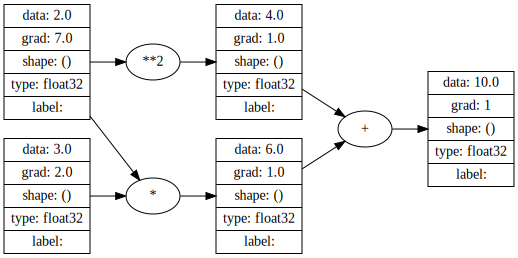

In [5]:
# create two tensors with gradients enabled
x = Atom(2.0, requires_grad=True)
y = Atom(3.0, requires_grad=True)

# define a function
z = x * y + x ** 2

# compute the backward pass
z.backward()

# print the gradients
print(x.grad) # 7.0
print(y.grad) # 2.0

draw_dot(z)

# Binary Classifiction Ex - Sample Dataset

In [6]:
x = [
    [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
  [0.0, 4.0, 0.5],
  [3.0, -1.0, 0.5]]
y = [1, 1, 0, 1, 0, 1]

x = Atom(x)
y = Atom(y)

In [7]:
n = 16
model = AtomNet(layers=[
    Layer(3, n, activation="tanh"),
    Layer(n, n, activation="tanh"),
    Layer(n , 1, activation="sigmoid")
])
optimizer = SGD(model.params(), lr=0.05)

In [9]:
model.fit(x, y, optimizer, binary_cross_entropy, binary_accuracy, epochs=50)

epoch: 0 | loss: 10.249054908752441  
epoch: 5 | loss: 1.8596115112304688  | accuracy: 83.0%
epoch: 10 | loss: 0.7872257232666016  | accuracy: 100.0%
epoch: 15 | loss: 0.39715659618377686  | accuracy: 100.0%
epoch: 20 | loss: 0.23964381217956543  | accuracy: 100.0%
epoch: 25 | loss: 0.17263896763324738  | accuracy: 100.0%
epoch: 30 | loss: 0.14601783454418182  | accuracy: 100.0%
epoch: 35 | loss: 0.11600304394960403  | accuracy: 100.0%
epoch: 40 | loss: 0.09604986757040024  | accuracy: 100.0%
epoch: 45 | loss: 0.0816292017698288  | accuracy: 100.0%


# Binary Classifiction Ex - Make Moons

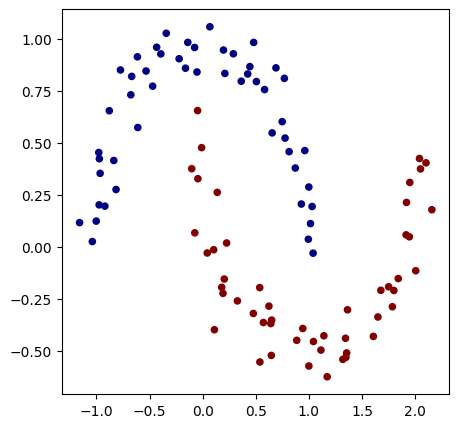

In [10]:
from sklearn.datasets import make_moons, make_blobs
X, Y = make_moons(n_samples=100, noise=0.1)

y_norm = Y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y_norm, s=20, cmap='jet')

X = Atom(X)
Y = Atom(Y)

In [11]:
n = 16
model2 = AtomNet(layers=[
    Layer(2, n, activation="tanh"),
    Layer(n, n, activation="tanh"),
    Layer(n, 1, activation="sigmoid")
])
optimizer2 = SGD(model2.params(), lr=0.01)

After two 200 epochs training runs i.e after running this cell twice

In [13]:
model2.fit(X, Y, optimizer2, binary_cross_entropy, binary_accuracy, epochs=200)

epoch: 0 | loss: 1.5243666172027588  | accuracy: 100.0%
epoch: 5 | loss: 1.597915530204773  | accuracy: 100.0%
epoch: 10 | loss: 1.3888626098632812  | accuracy: 100.0%
epoch: 15 | loss: 1.3579151630401611  | accuracy: 100.0%
epoch: 20 | loss: 1.404650330543518  | accuracy: 100.0%
epoch: 25 | loss: 1.3532874584197998  | accuracy: 100.0%
epoch: 30 | loss: 1.3134849071502686  | accuracy: 100.0%
epoch: 35 | loss: 1.1828057765960693  | accuracy: 100.0%
epoch: 40 | loss: 1.1275118589401245  | accuracy: 100.0%
epoch: 45 | loss: 1.2012145519256592  | accuracy: 100.0%
epoch: 50 | loss: 1.0806348323822021  | accuracy: 100.0%
epoch: 55 | loss: 1.057473063468933  | accuracy: 100.0%
epoch: 60 | loss: 0.993168294429779  | accuracy: 100.0%
epoch: 65 | loss: 0.9645692110061646  | accuracy: 100.0%
epoch: 70 | loss: 0.9384722113609314  | accuracy: 100.0%
epoch: 75 | loss: 1.1275737285614014  | accuracy: 100.0%
epoch: 80 | loss: 1.0805377960205078  | accuracy: 100.0%
epoch: 85 | loss: 0.9154216051101685 

We get great predictions!

In [14]:
pred = model2.predict(X[40])
pred, Y[40]

(Atom(data=[[0.99895513]], requires_grad=True, dtype=float32),
 Atom(data=1.0, requires_grad=True, dtype=float32))

# Binary Classification Ex - Images

Here we make dummy 10 images 4x4 RGB images with Atom.randint()

In [15]:
num_images = 10
pixels = 4
labels = 2
x = Atom([Atom.randint(0, 256, (pixels, pixels, 3)).data for _ in range(num_images)]) # (10, 4, 4, 3)
y = Atom.randint(0, labels, (num_images)) # (10,) classes of 0 or 1
x_flat = x.reshape((len(x.data), -1)) # (10, 4*4*3)
x_flat = x_flat / 255.0 # We scale down all pixel values to be between 0 and 1

In [16]:
n = 32
model3 = AtomNet(layers=[
    Layer(pixels**2 * 3, n, activation="tanh"),
    Layer(n, n, activation="tanh"),
    Layer(n , 1, activation="sigmoid")
])
optimizer3 = SGD(model3.params(), 0.05)

In [17]:
model3.fit(x_flat, y, optimizer3, binary_cross_entropy, binary_accuracy, epochs=50)

epoch: 0 | loss: 9.462693214416504  | accuracy: 60.0%
epoch: 5 | loss: 11.720879554748535  | accuracy: 70.0%
epoch: 10 | loss: 9.395328521728516  | accuracy: 50.0%
epoch: 15 | loss: 0.6129465699195862  | accuracy: 100.0%
epoch: 20 | loss: 0.3724689185619354  | accuracy: 100.0%
epoch: 25 | loss: 0.32522904872894287  | accuracy: 100.0%
epoch: 30 | loss: 0.3145204186439514  | accuracy: 100.0%
epoch: 35 | loss: 0.21714860200881958  | accuracy: 100.0%
epoch: 40 | loss: 0.17980939149856567  | accuracy: 100.0%
epoch: 45 | loss: 0.14522340893745422  | accuracy: 100.0%


# Binary Classifiction Ex - MNIST Digits Dataset

In [18]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=2) # We get 360 8x8 images representing the 1 or 0 digit
x = Atom(digits.data) / 16 # (360, 64) | We scale down all pixel values to be between 0 and 1 (here highest pixel value is 16)
y = Atom(digits.target) # (360, )
x.shape

(360, 64)

In [21]:
n = 64
model4 = AtomNet(layers=[
    Layer(64, n, activation="tanh"),
    Layer(n, n, activation="tanh"),
    Layer(n , 1, activation="sigmoid")
])
optimizer4 = SGD(model4.params(), lr=0.0005)

We train on 50 images for now for effeciency

In [22]:
model4.fit(x[:50], y[:50], optimizer4, binary_cross_entropy, binary_accuracy, epochs=100)

epoch: 0 | loss: 122.04371643066406  | accuracy: 50.0%
epoch: 5 | loss: 16.801082611083984  | accuracy: 90.0%
epoch: 10 | loss: 7.172224998474121  | accuracy: 96.0%
epoch: 15 | loss: 4.987491130828857  | accuracy: 98.0%
epoch: 20 | loss: 3.374624013900757  | accuracy: 100.0%
epoch: 25 | loss: 2.5645673274993896  | accuracy: 100.0%
epoch: 30 | loss: 2.48653507232666  | accuracy: 100.0%
epoch: 35 | loss: 1.8643896579742432  | accuracy: 100.0%
epoch: 40 | loss: 1.592482566833496  | accuracy: 100.0%
epoch: 45 | loss: 1.3929227590560913  | accuracy: 100.0%
epoch: 50 | loss: 1.1847401857376099  | accuracy: 100.0%
epoch: 55 | loss: 1.0975691080093384  | accuracy: 100.0%
epoch: 60 | loss: 1.0254665613174438  | accuracy: 100.0%
epoch: 65 | loss: 0.9420502781867981  | accuracy: 100.0%
epoch: 70 | loss: 0.9098654985427856  | accuracy: 100.0%
epoch: 75 | loss: 0.8248981237411499  | accuracy: 100.0%
epoch: 80 | loss: 0.7845367789268494  | accuracy: 100.0%
epoch: 85 | loss: 0.7480065226554871  | acc

We predict on unseen data i.e the 55th image

In [23]:
pred = model4(x[55])
true = y[55]

We get great predictions!

In [24]:
pred, true

(Atom(data=[[0.97024214]], requires_grad=True, dtype=float32),
 Atom(data=1.0, requires_grad=True, dtype=float32))

<Figure size 640x480 with 0 Axes>

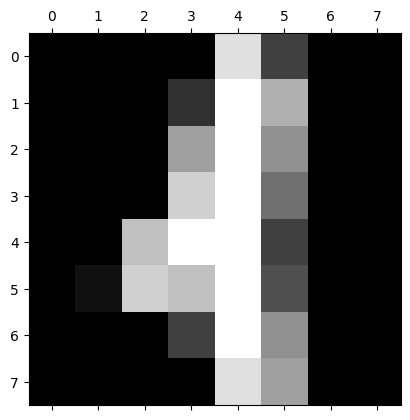

In [25]:
plt.gray()
plt.matshow(digits.images[55])
plt.show()